#### Importing required libraries and reading CSV

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df =pd.read_csv("C:\\Users\\pvpar\\OneDrive\\Desktop\\Doctor fee prediction project\\practo_cleandata.csv")

In [ ]:
df

,Unnamed: 0,Name,Degree,Specialization,Experience,Location,City,Recommendation,Feedback,Fees
0,0,Dr. Sourabh Nagpal,BDS,Dentist,17,Vasant Vihar,Delhi,99,623,500
1,1,Dr. Meeka Gulati,BDS,Dentist,15,Janakpuri,Delhi,97,108,500
2,2,Dr. Aparna Singhal,BDS,Dentist,14,Punjabi Bagh,Delhi,98,96,300
3,3,Dr. Prashant Ojha,MDS,Dentist,16,Saket,Delhi,92,104,300
4,4,Dr. Anukriti Bansal Aggarwal,BDS,Dentist,10,Rohini Sector 18,Delhi,10,74,400
...,...,...,...,...,...,...,...,...,...,...
5022,5053,Dr. Sreesha N,MBBS,Dentist,18,Yelahanka New Town,Bangalore,10,10,300
5023,5054,Dr. Roshan Varghese,MBBS,Dentist,14,Horamavu,Bangalore,10,55,300
5024,5055,Dr. Vinayak Raghunathan,MBBS,Dentist,14,JP Nagar,Bangalore,10,145,500
5025,5056,Dr. Idris Md,MBBS,Dentist,13,Jayanagar 5 Block,Bangalore,99,131,300


In [ ]:
df.drop(columns = "Unnamed: 0", inplace=True)

In [ ]:
df

,Name,Degree,Specialization,Experience,Location,City,Recommendation,Feedback,Fees
0,Dr. Sourabh Nagpal,BDS,Dentist,17,Vasant Vihar,Delhi,99,623,500
1,Dr. Meeka Gulati,BDS,Dentist,15,Janakpuri,Delhi,97,108,500
2,Dr. Aparna Singhal,BDS,Dentist,14,Punjabi Bagh,Delhi,98,96,300
3,Dr. Prashant Ojha,MDS,Dentist,16,Saket,Delhi,92,104,300
4,Dr. Anukriti Bansal Aggarwal,BDS,Dentist,10,Rohini Sector 18,Delhi,10,74,400
...,...,...,...,...,...,...,...,...,...
5022,Dr. Sreesha N,MBBS,Dentist,18,Yelahanka New Town,Bangalore,10,10,300
5023,Dr. Roshan Varghese,MBBS,Dentist,14,Horamavu,Bangalore,10,55,300
5024,Dr. Vinayak Raghunathan,MBBS,Dentist,14,JP Nagar,Bangalore,10,145,500
5025,Dr. Idris Md,MBBS,Dentist,13,Jayanagar 5 Block,Bangalore,99,131,300


In [ ]:
for column in df.columns:
  print(df[column].value_counts())
  print("-"*20)

Dr. Mutyalatha Koppula       6
Dr. Garima Sharma            5
Dr. Pannam Sharma            4
Dr. Chandrashekar            4
Dr. Pooja Gupta              4
                            ..
Dr. Karishma Bhate-Chavan    1
Dr. Pavitra Shanbhag Bhat    1
Dr. A. K. Tandon             1
Dr. Pallavi Bipte            1
Dr. Prahlad Shenava          1
Name: Name, Length: 4217, dtype: int64
--------------------
MBBS             3170
BDS               730
BPTh/BPT          236
MD                187
MS                152
MDS                97
DNB                90
Diploma            40
MPTh/MPT           31
BSc                30
DM                 28
MCh                28
DGO                28
M.D                24
Post               24
MSc                23
M.Sc               14
Masters            12
Doctor              9
DDVL                8
FCPS                6
B.Sc                6
DPM                 5
DO                  4
Fellow              3
BHMS                3
FRCS                3
PhD  

In [ ]:
degree_count = df['Degree'].value_counts()
degree_count_less_10 = degree_count[degree_count <=10]
df['Degree'] = df['Degree'].apply(lambda x: 'other' if x in degree_count_less_10 else x)

In [ ]:
Location_count = df['Location'].value_counts()
Location_count_less_10 = Location_count[Location_count <=10]
df['Location'] = df['Location'].apply(lambda x: 'other' if x in Location_count_less_10 else x)

In [ ]:
df['Location'].value_counts()

other                 1011
Whitefield             126
Sarita Vihar           124
Bannerghatta Road      124
Indiranagar            105
                      ... 
Kumaraswamy Layout      11
Andheri                 11
Opera House             11
RT Nagar                11
Hulimavu                11
Name: Location, Length: 107, dtype: int64

In [ ]:
df.drop(columns='Name', inplace=True)

In [ ]:
df.head()

,Degree,Specialization,Experience,Location,City,Recommendation,Feedback,Fees
0,BDS,Dentist,17,other,Delhi,99,623,500
1,BDS,Dentist,15,Janakpuri,Delhi,97,108,500
2,BDS,Dentist,14,Punjabi Bagh,Delhi,98,96,300
3,MDS,Dentist,16,Saket,Delhi,92,104,300
4,BDS,Dentist,10,other,Delhi,10,74,400


#### EDA

C:\Users\pvpar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


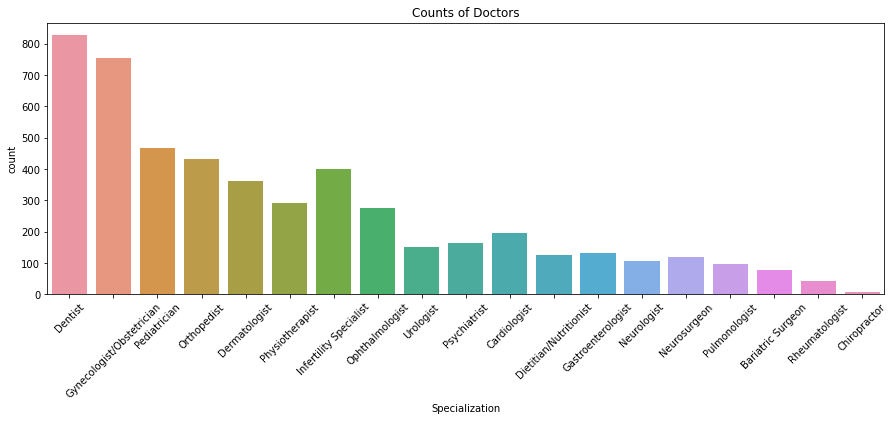

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(df['Specialization'])
plt.xticks(rotation=45)
plt.title("Counts of Doctors")
plt.show()

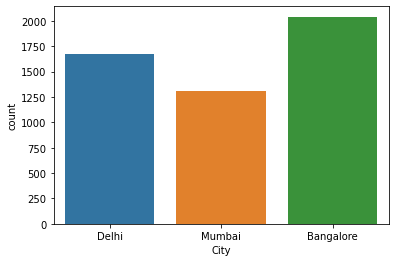

In [ ]:
sns.countplot(x=df['City'])
plt.show()

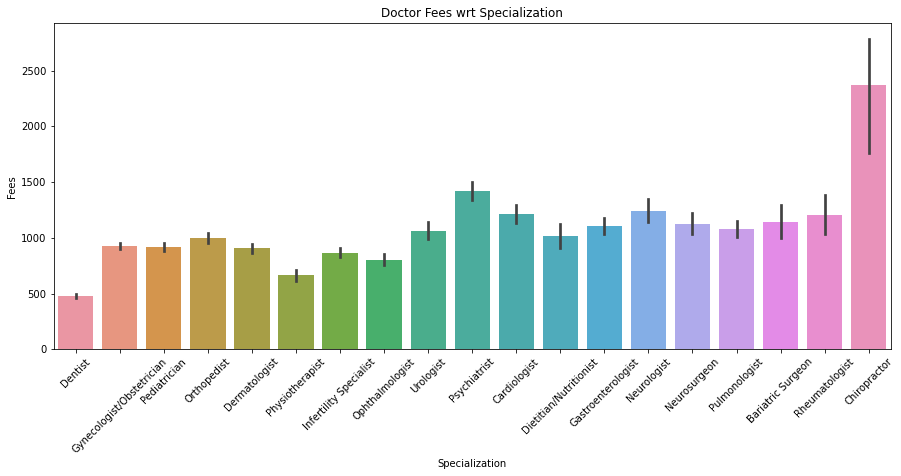

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x='Specialization',y='Fees',data=df)
plt.title("Doctor Fees wrt Specialization")
plt.xticks(rotation=45)
plt.show()

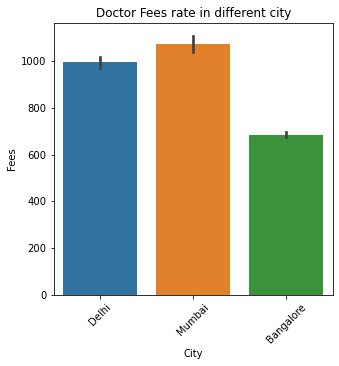

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(x='City',y='Fees',data=df)
plt.title("Doctor Fees rate in different city")
plt.xticks(rotation=45)
plt.show()

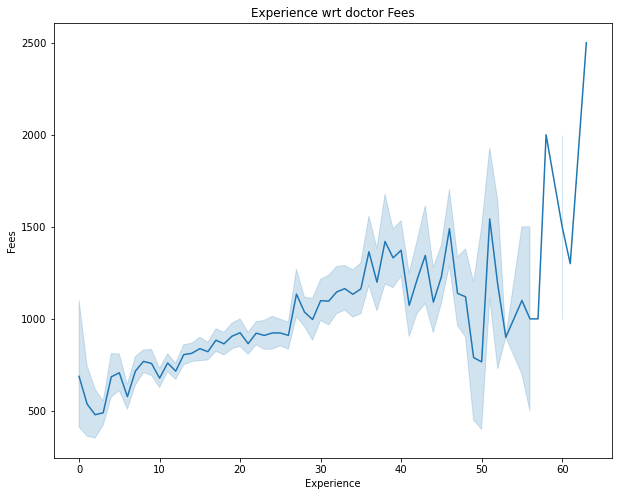

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.lineplot(x='Experience',y='Fees',data=df)
ax.set_title("Experience wrt doctor Fees")
plt.show()

In [ ]:
## after comapring fees and experinece we got that fees is directly propartional to experinece of doctor gain

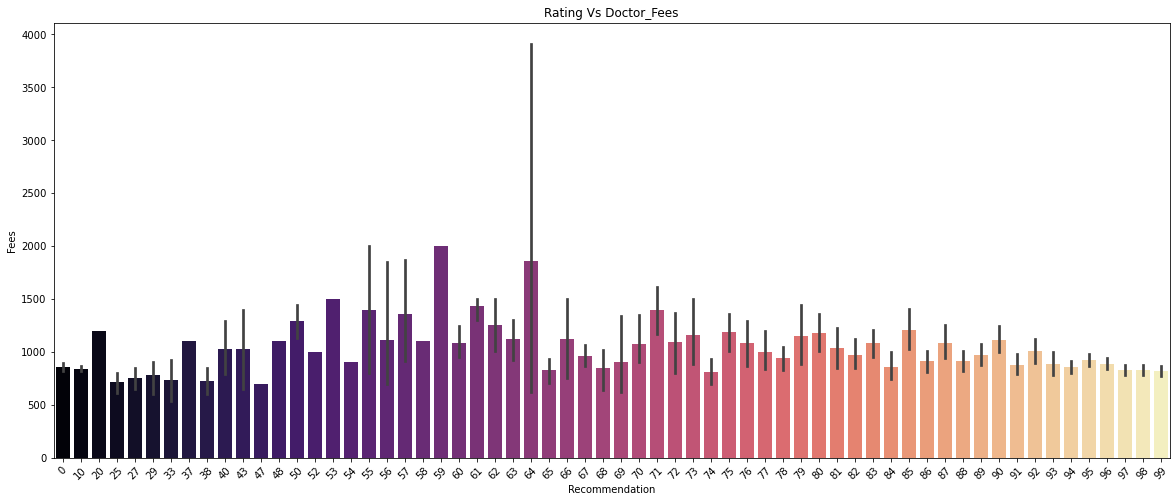

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x='Recommendation',y='Fees',data=df,palette='magma')
plt.title("Rating Vs Doctor_Fees")
plt.xticks(rotation=45)
plt.show()

In [ ]:
## comparing recommendation and fees we have`t got any relation between them

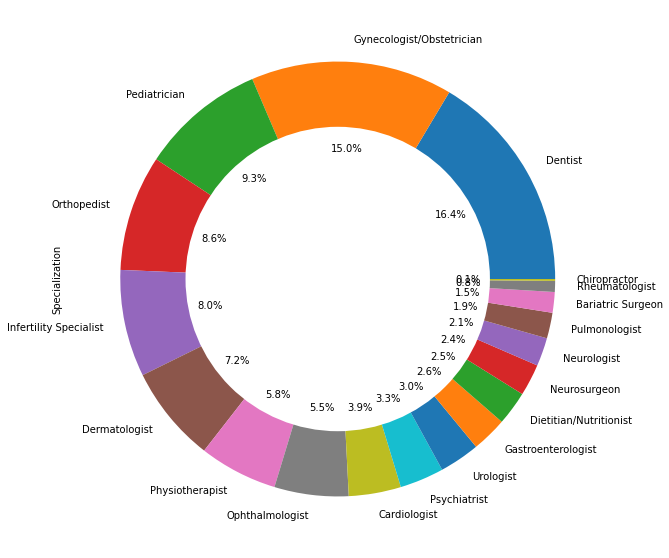

In [ ]:
plt.figure(figsize=(10,10))
#plt.subplot(1,2,1)
df['Specialization'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
#plt.ylabel('')
#plt.subplot(3,2,2)
#sns.countplot(x='Specialization',data=df)
#plt.xticks(rotation=45)
#df['Specialization'].value_counts()

Minimum 0
Maximum 5000


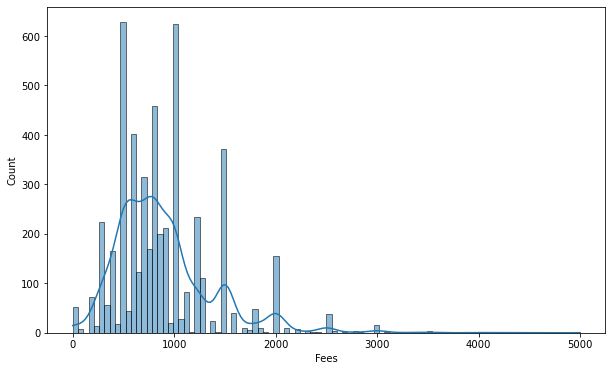

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['Fees'],kde=True,palette=True)
print('Minimum',df['Fees'].min())
print('Maximum',df['Fees'].max())

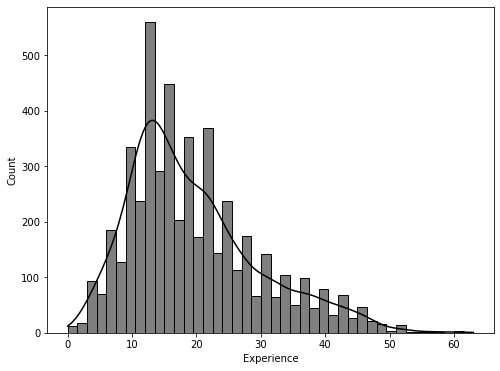

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(df['Experience'],kde=True,color='k')
plt.show()

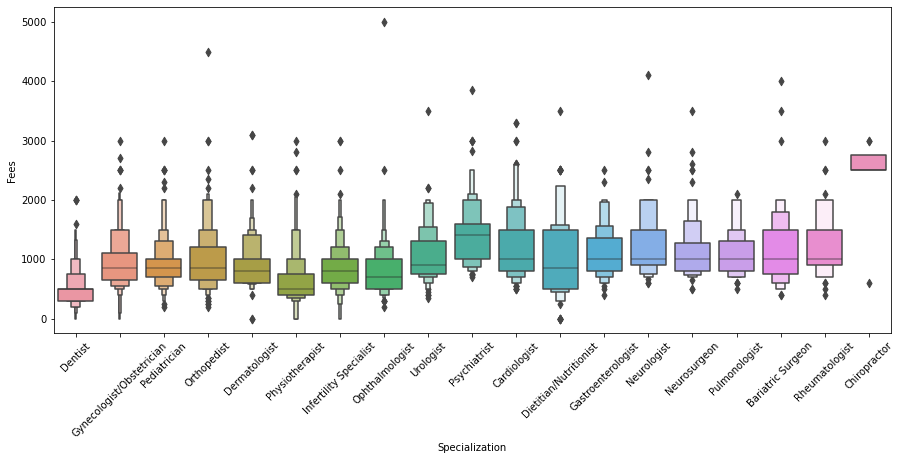

In [ ]:
plt.figure(figsize=(15,6))
sns.boxenplot(x='Specialization',y='Fees',data=df)
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:>

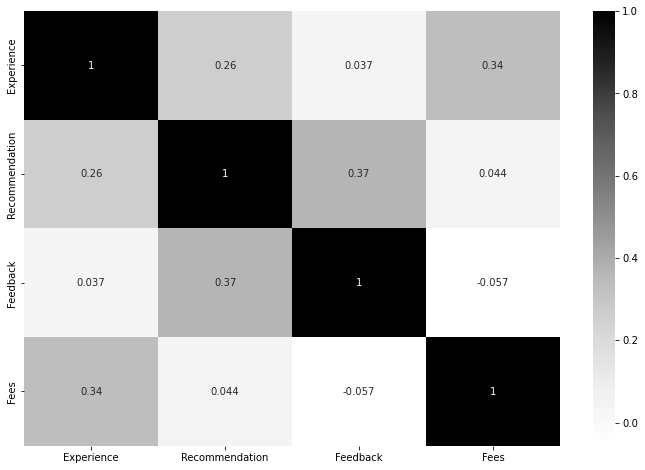

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='Greys')